data 01/27/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2 - Linear Regression with Gradient Descent

2.1 Gradient Descent

2.2 Stochastic Gradient Descent

2.3 Adding Momentum

## 2.1 Gradient Descent

To train a Linear Regression model we need to find the value of $\theta$ that minimizes

$$
\mbox{MSE}(\theta) = \frac{1}{m}\| y - X\theta \|_2^2,
$$

where $m$ is the size of the dataset.

To implement Gradient Descent, we need the gradient of the MSE function:

$$
\nabla\, \mbox{MSE}(\theta) = \frac{2}{m} \, X^T(X\theta - y).
$$

The Gradient Descent Step is:

$$
\theta = \theta - \frac{2s}{m} \, X^T(X\theta-y),
$$
where $s$ is the learning rate.

### Example

Let's generate some random dataset to test Gradient Descent

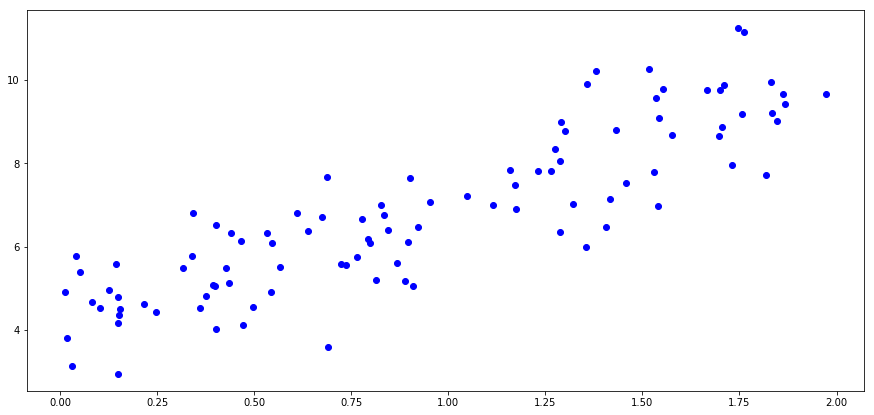

In [2]:
m = 100
x = 2*np.random.rand(m,1) #m uniformly distributed random numbers over [0,2]
y = 4+3*x+np.random.randn(m,1) #line + random Gaussian noise
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

Let's look at a quick implementation of the Gradient Descent method. 

In [41]:
X = np.c_[np.ones(m),x]
s = 0.1 #learning rate

ValueError: all the input array dimensions except for the concatenation axis must match exactly

Text(0.5, 1.0, 'MSE = 0.7464383787809544')

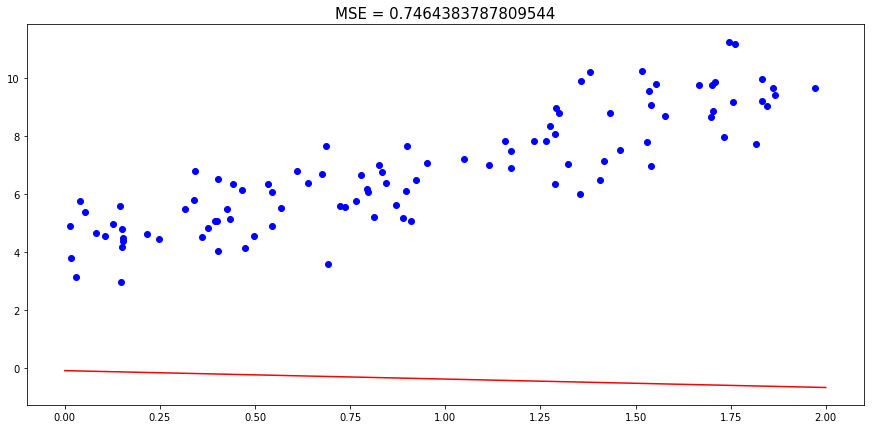

In [4]:
'Initialization'
theta = np.random.randn(2,1)

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

"plot the data and the linear model"
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

Text(0.5, 1.0, 'MSE = 0.4513688695464033')

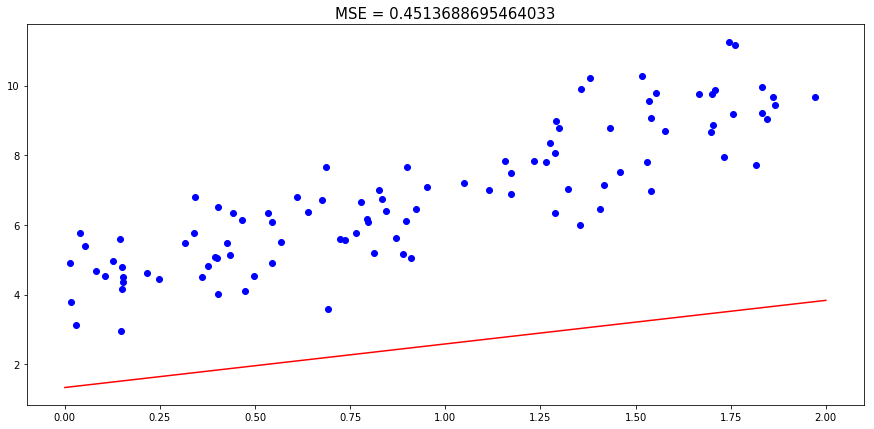

In [5]:
'Gradient Descent Step'
gradient = (2/m)*X.T@(X@theta-y)
theta = theta - s*gradient

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

### Choosing the learning rate

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

Text(0.5, 1.0, 'MSE = 0.12064691634280784')

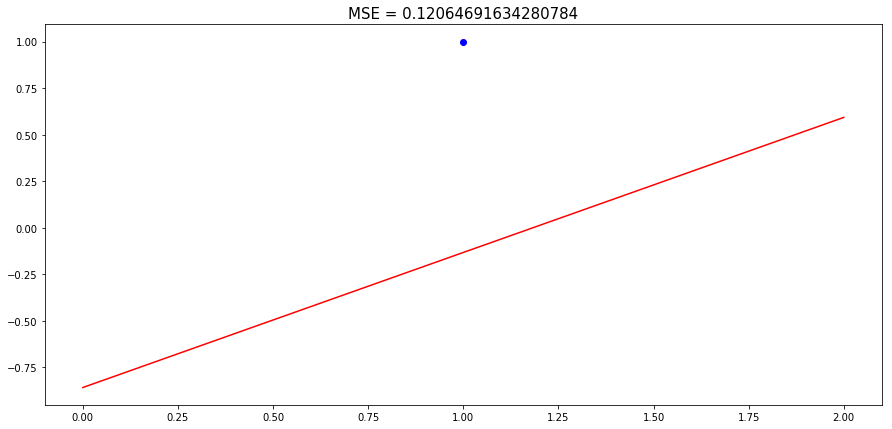

In [40]:
s = 0.01 #small learning rate

theta = np.random.randn(2,1) #random initialization

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

"plot the data and the linear model"
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

Text(0.5, 1.0, 'MSE = 0.6229087471464888')

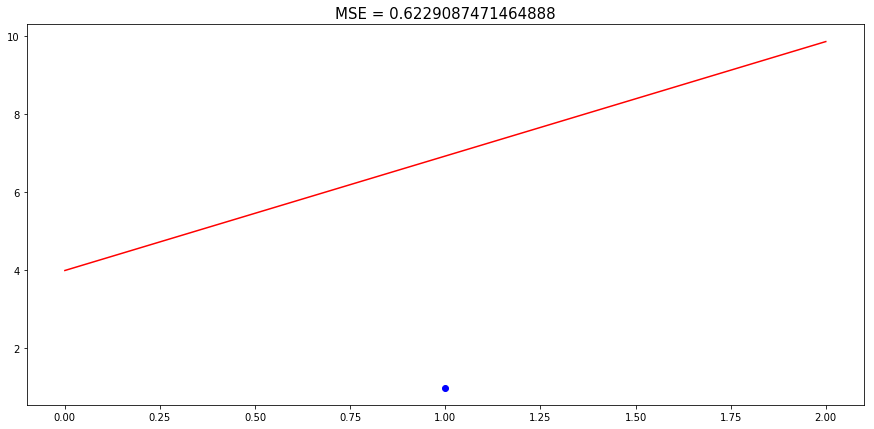

In [32]:
'Gradient Descent Step'
gradient = (2/m)*X.T@(X@theta-y)
theta = theta - s*gradient

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

If the learning rate is too high, the algorithm might jump across the minimum and end up on the other side, possibily even higher up than you were before. This might make the algorithm diverge.

Text(0.5, 1.0, 'MSE = 0.11022997645448512')

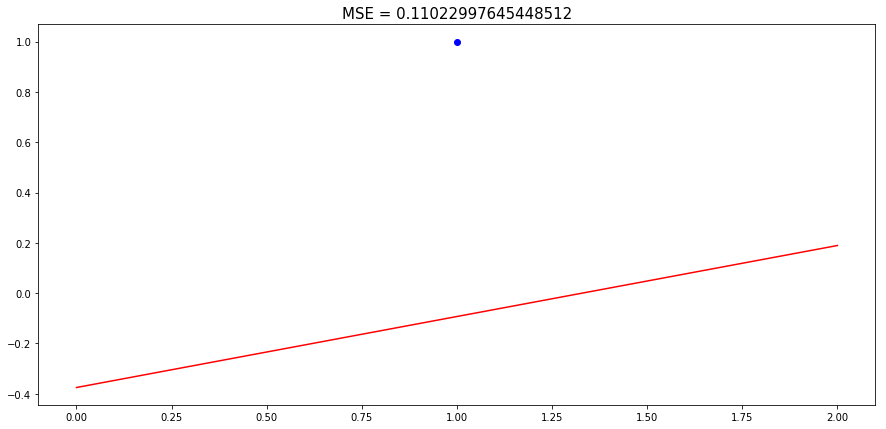

In [39]:
s = 0.5 #small learning rate

theta = np.random.randn(2,1) #random initialization

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

"plot the data and the linear model"
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

Text(0.5, 1.0, 'MSE = 0.6119875960794281')

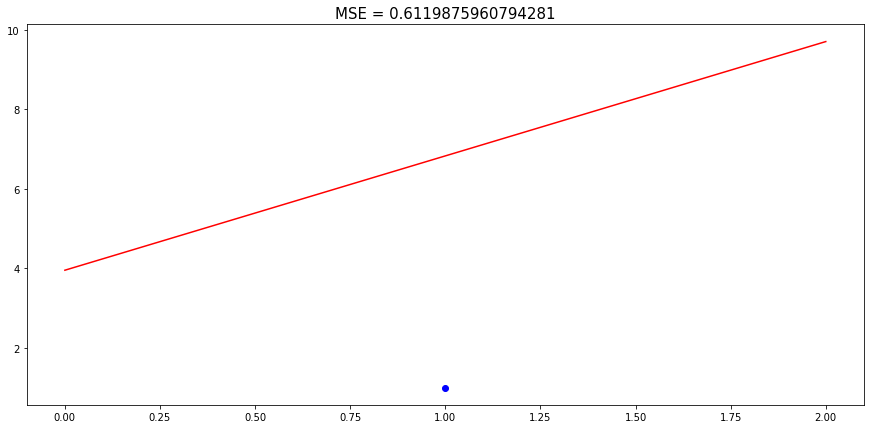

In [36]:
'Gradient Descent Step'
gradient = (2/m)*X.T@(X@theta-y)
theta = theta - s*gradient

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

### Gradient Descent Function

In [10]:
def linregression_GD(X,y,s,n_iterations):
    m,n = X.shape #size of data set, number of features
    theta = np.random.randn(n,1) #random initialization
    for iterations in range(n_iterations):
        gradient = 2*X.T@(X@theta-y)/m
        theta = theta - s*gradient
    return theta

Text(0.5, 1.0, 'MSE = 0.09764970118504884')

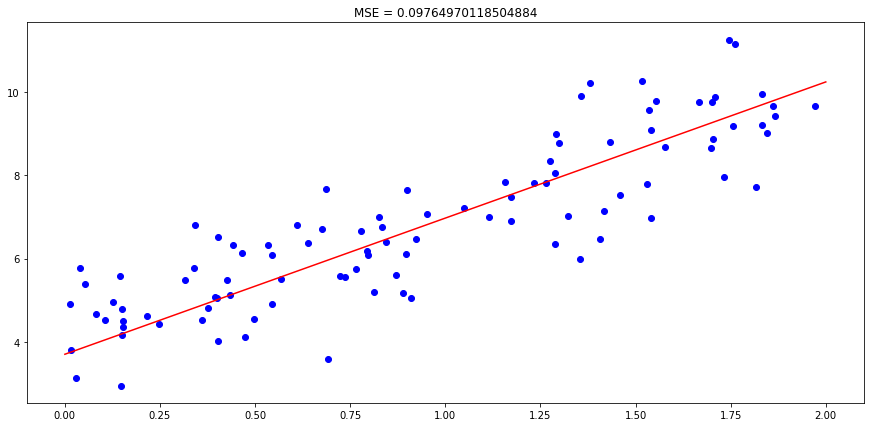

In [11]:
'test linregression_GD'
s = 0.1 #learning rate
n_iterations = 50 #number of Gradient Descent iterations
X = np.c_[np.ones(100), x]
theta = linregression_GD(X,y,s,n_iterations)

'MSE'
MSE = np.linalg.norm(X@theta-y)/m

"plot the data and the linear model"
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')
x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')
plt.title('MSE = '+str(MSE))

## 2.2 Stochastic Gradient Descent

Gradient Descent uses the whole training set to compute th gradient at every step. 
This makes is very slow when the training set is large. **Stochastic Gradient Descent** picks a random instance in the training set at every step and computes the gradient based only on that single instrance

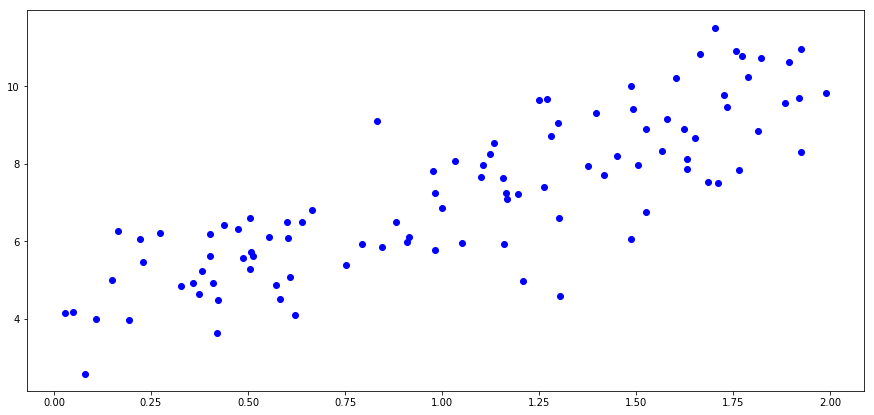

In [12]:
m = 100
x = 2*np.random.rand(m,1) #m uniformly distributed random numbers over [0,2]
y = 4+3*x+np.random.randn(m,1) #line + random Gaussian noise
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo') 

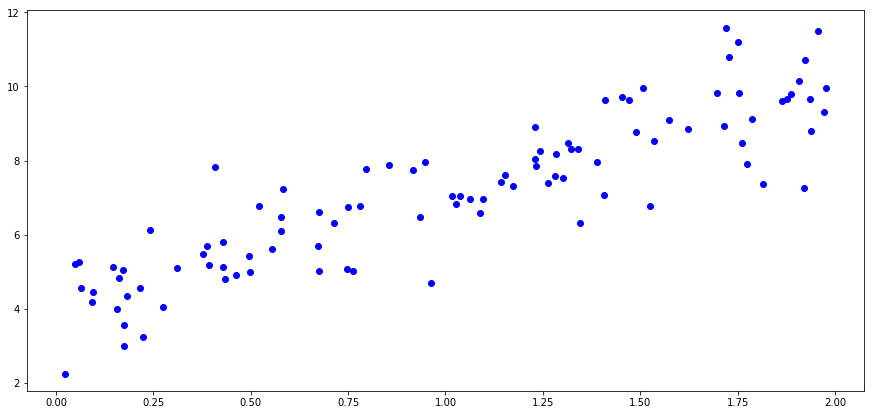

In [13]:
m = 100
x = 2*np.random.rand(m,1) #m uniformly distributed random numbers over [0,2]
X = np.c_[np.ones(m),x]
y = 4+3*x+np.random.randn(m,1) #line + random Gaussian noise
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

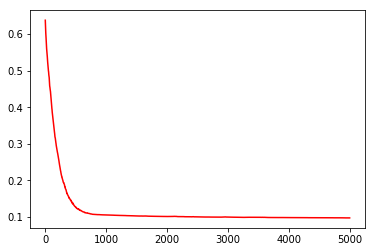

In [14]:
'Stochastic Gradient Descent (SGD)'
n_iterations = 5000 #number of SGD steps
theta = np.random.rand(2,1) #random initialization
MSE = np.zeros((n_iterations,1)) #we will compute the MSE function after each SGD step
s = 0.1 #learning rate

for i in range(n_iterations):
    random_row = np.random.randint(m) #pick a random integer in [0,m-1]
    xi = X[random_row] #ith row; 
    xi = xi[None,:] #keep xi as a row vector
    yi = y[random_row]
    gradient = (2/m)*xi.T@(xi@theta-yi)
    theta = theta - s*gradient
    MSE[i] = np.linalg.norm(y-X@theta)/m
    
plt.plot(MSE,'r-')

In [15]:
i = 10
xi = X[i]
xi[:,None]

array([[1.        ],
       [0.58401218]])

### Learning Function

Stochastic Gradient Descent is much less regular than Gradient Descent. 
Instead of gently decreasing until it reaches the minimum, the MSE cost function bounce up and down, decreasing only on average.

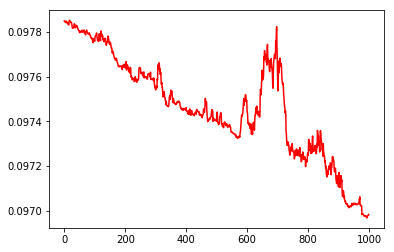

In [16]:
plt.plot(MSE[4000:],'r-')

One solution is to gradually reduce the learning rate

In [17]:
s0,s1 = 5, 50 #learning function hyperparameters
def learning_function(t):
    return s0/(t+s1)

Text(0.5, 1.0, 'learning rate schedule')

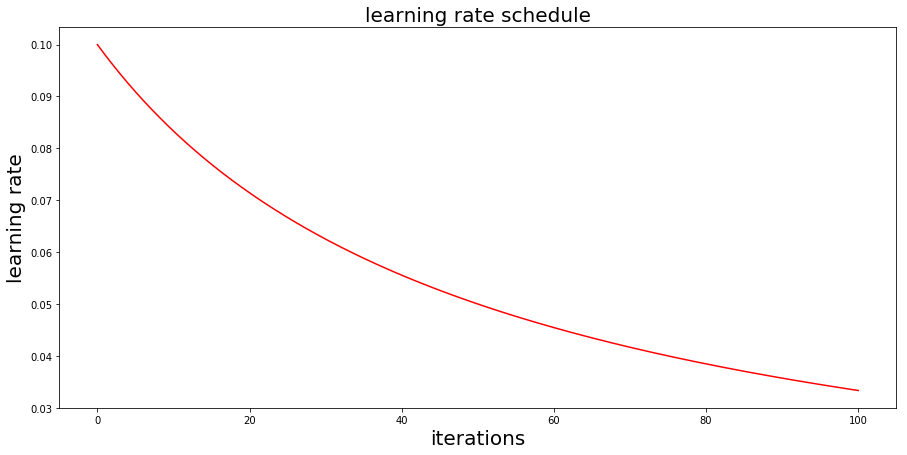

In [18]:
'plot learning function'
t_plot = np.linspace(0,100,1000)
f_plot = learning_function(t_plot)

plt.figure(figsize=(15,7))
plt.plot(t_plot,f_plot,'r-')
plt.xlabel('iterations',fontsize=20)
plt.ylabel('learning rate',fontsize=20)
plt.title('learning rate schedule',fontsize=20)

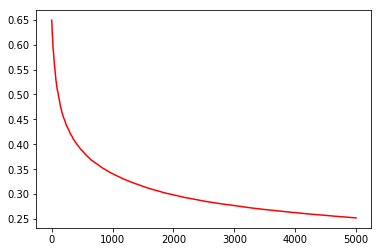

In [19]:
'Stochastic Gradient Descent (SGD) with a learning function'
n_iterations = 5000 #number of SGD steps
theta = np.random.rand(2,1) #random initialization
MSE = np.zeros((n_iterations,1)) #we will compute the MSE function after each SGD step

for i in range(n_iterations):
    random_row = np.random.randint(m) #pick a random integer in [0,m-1]
    xi = X[None,random_row] #keep xi as a row vector
    yi = y[random_row]
    gradient = (2/m)*xi.T@(xi@theta-yi)
    theta = theta - s*gradient
    s = learning_function(i)
    MSE[i] = np.linalg.norm(y-X@theta)/m
    
plt.plot(MSE,'r-')

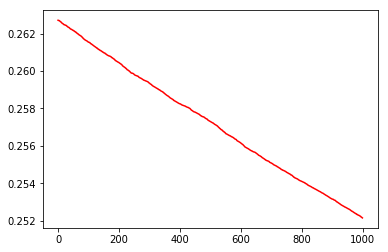

In [20]:
plt.plot(MSE[4000:],'r-')

### Stochastic Gradient Descent Function

In [21]:
def linregression_SGD(X,y,n_epochs):
    m,n = X.shape
    theta = np.random.randn(2,1) #random initialization
    
    for epoch in range(n_epochs):
        for i in range(m):
            random_row = np.random.randint(m)
            xi = X[None,random_row] #keep xi as a row vector
            yi = y[random_row]
            gradient = 2*xi.T@(xi@theta-yi)
            s = learning_function(epoch*m+i)
            theta = theta - s*gradient
    return theta

Text(0.5, 1.0, 'MSE = 0.09631931254858635')

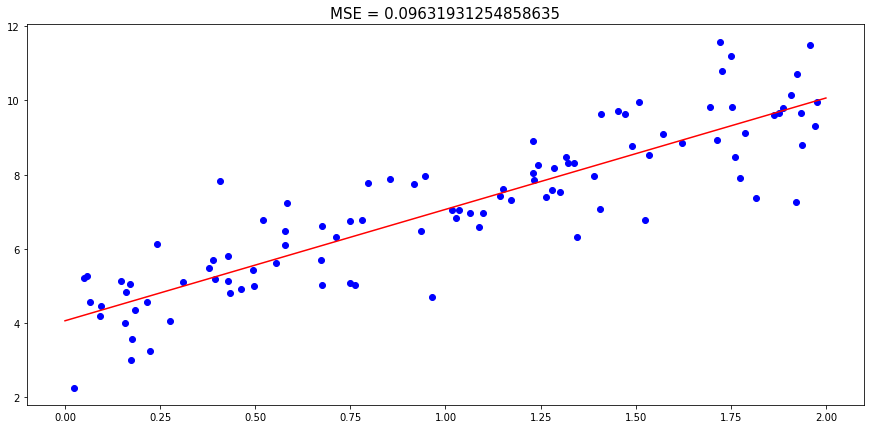

In [22]:
'testing linregression_SGD'
n_epochs = 100
s0,s1 = 5,50
theta = linregression_SGD(X,y,n_epochs)

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.array([0,2])
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')

plt.title('MSE = '+str(MSE),fontsize=15)

## 2.3 Adding Momentum

Let's apply Gradient Descent to the function

$$f(x,y) = \frac{1}{2}(x^2+py^2), \quad p\in(0,1). $$

In [23]:
def naughty_f(x,y):
    p = 0.1
    return 0.5*(x**2+p*y**2)

The Gradient of $f(x,y)$ is given by

$$
\nabla f(x,y) = 
\begin{bmatrix} 
    x \\
    py
\end{bmatrix}
$$

In [24]:
def naughty_gradient(x,y):
    p = 0.1
    return np.array([x,p*y])

In [25]:
'test naughty_f and naughty_gradient'
x = 1
y = 1
print(naughty_f(x,y))
print(naughty_gradient(x,y))

0.55
[1.  0.1]


The minimum value of $f$ is zero. 
That minimum is reached at the point $(0,0)$.

In [26]:
'function for plotting level curves of naughty_f'
def naughty_contour(a,b,level,mesh_size=1000):
    xlist = np.linspace(a, b, mesh_size)
    ylist = np.linspace(a, b, mesh_size)
    X, Y = np.meshgrid(xlist, ylist)
    Z = naughty_f(X,Y)
    plt.contour(X,Y,Z,level)

TypeError: len() of unsized object

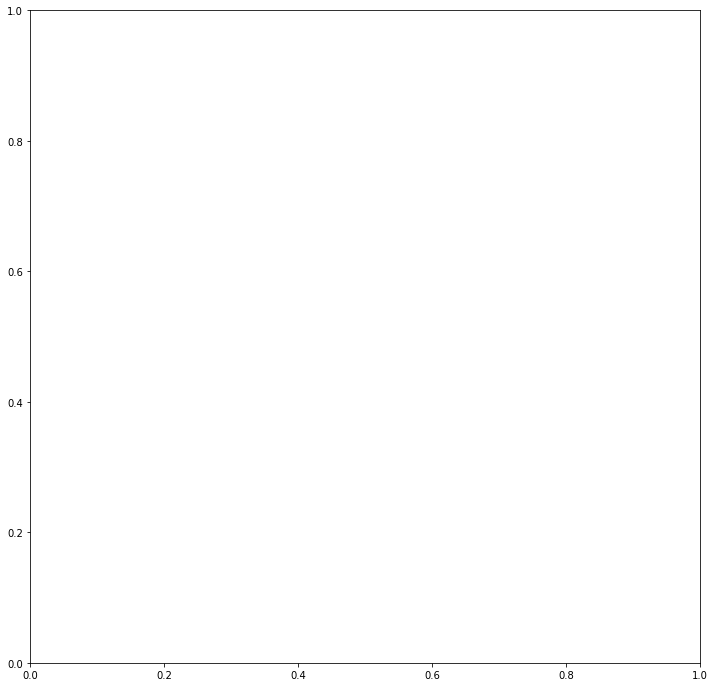

In [27]:
'test naughty_contour'
plt.figure(figsize = (12,12))
naughty_contour(-4,4,0.3)
plt.title('level curve f(x,y)=0.3',fontsize=20)

In [ ]:
'Gradient Descent'
plt.figure(figsize = (12,12))
plt.title('on a zig-zag path to the minimum',fontsize = 20)

s = 1.8 #learning rate

x = np.array([0.8,3]) #initial point (0.8,3)
plt.plot(x[0],x[1],'bo',MarkerSize=10)
z = naughty_f(x[0],x[1])
naughty_contour(-4,4,z)

it = 10 #number of GD iterations
for i in range(it): 
    new_x = x-s*naughty_gradient(x[0],x[1])
    plt.plot(new_x[0],new_x[1],'bo',MarkerSize=10)
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r-')
    
    
    x = new_x
    z = naughty_f(x[0],x[1])
    naughty_contour(-4,4,z)
    

The slow ziz-zag path is a real problem. We have to improve it.

Key idea: the direction of the new step remembers the previous direction:

$$
x_i = x_{i-1}+d_i, \quad \mbox{where} \quad d_i = -s\nabla f(x_i)+\beta \, d_{i-1}
$$

In [ ]:
beta = 0.2 #momentum parameter
b = 0.1
'Gradient Descent'
plt.figure(figsize = (12,12))
s = 1.6 #learning rate
x = np.array([0.8,3]) #initial point (0.8,3)
plt.plot(x[0],x[1],'bo',MarkerSize=10)
z = naughty_f(x[0],x[1])
naughty_contour(-4,4,z)

d_current = np.zeros(2)
d_previous = np.zeros(2)

for i in range(10): #10 iterations of GD
    
    d_current = -s*naughty_gradient(x[0],x[1]) + beta*d_previous
    
    new_x = x+d_current
    plt.plot(new_x[0],new_x[1],'bo',MarkerSize=10)
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r-')
    
    
    x = new_x
    z = naughty_f(x[0],x[1])
    naughty_contour(-4,4,z)
    d_previous = d_current